# Module 7 Exercises - Linear Regression

### Exercise 1:

Using the pandas library, in the datasets folder load the gradedata.csv file as a dataframe. Narrow your data (make the dataframe smaller) by choosing columns that you think can help predict student grades. Use any method that you've learned so far to help your decision on which columns to keep. 

In [9]:
import os
os.getcwd

<function nt.getcwd()>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn #library for predictive modeling

%matplotlib inline

In [11]:
location = 'datasets/gradedata.csv'
df=pd.read_csv (location)
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [12]:
df.keys()

Index(['fname', 'lname', 'gender', 'age', 'exercise', 'hours', 'grade',
       'address'],
      dtype='object')

In [14]:
df1=df.drop(['fname', 'lname', 'gender','address'], axis=1)

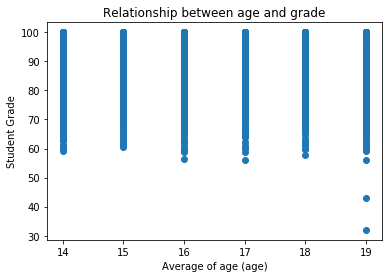

In [15]:
plt.scatter(df1['age'], df1['grade'])
plt.xlabel("Average of age (age)")
plt.ylabel("Student Grade")
plt.title("Relationship between age and grade")
plt.show()

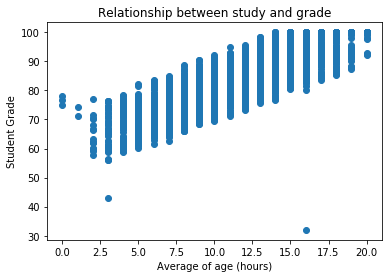

In [16]:
plt.scatter(df1['hours'], df1['grade'])
plt.xlabel("Average of age (hours)")
plt.ylabel("Student Grade")
plt.title("Relationship between study and grade")
plt.show()

### Exercise 2:

Using the dataframe in the exercise above, clean and prepare your data. This means to eliminate any null (missing) values (either by dropping or filling them) and to transform any data column types to numerical values that a model can interpret. For example, if the column has string values, convert them to integers that best represent their order.

In [17]:
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [18]:
df1.count()

age         2000
exercise    2000
hours       2000
grade       2000
dtype: int64

In [21]:
def numeric_column(x):
    if x=='female':
        return 1
    if x=='male':
        return 0
df['gendr_v'] = df['gender'].apply(numeric_column)

In [22]:
df.head()

,fname,lname,gender,age,exercise,hours,grade,address,gendr_v
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747",1
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780",0
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060",0
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125",1
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035",1


### Exercise 3:

Using the cleaned dataframe in the exercise above, use the sklearn library to split the data into training and test datasets. Make the test size 30%.

In [31]:
from sklearn.linear_model import LinearRegression

#make dataframe that only contains predictive features
X = df1.drop('grade', axis = 1)

#assign linear regression function to a variable
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
df2=df.drop(['fname', 'lname', 'gender', 'address'], axis=1)
df2.head()

,age,exercise,hours,grade,gendr_v
0,17,3,10,82.4,1
1,18,4,4,78.2,0
2,18,5,9,79.3,0
3,14,2,7,83.2,1
4,18,4,15,87.4,1


In [33]:
X = df2.drop('grade', axis = 1)
X.head()


,age,exercise,hours,gendr_v
0,17,3,10,1
1,18,4,4,0
2,18,5,9,0
3,14,2,7,1
4,18,4,15,1


In [34]:
X.columns


Index(['age', 'exercise', 'hours', 'gendr_v'], dtype='object')

In [36]:
lm.fit(X, df2['grade'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
print('Estimated intercept coefficient :', lm.intercept_)

Estimated intercept coefficient : 57.63896169839089


In [41]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 4


In [42]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,age,0.040501
1,exercise,0.984133
2,hours,1.917324
3,gendr_v,0.448484


In [43]:
lm.predict(X)[0:5]

array([80.90159641, 69.9738035 , 80.54455494, 74.04398978, 91.51284876])

In [45]:
lm.score(X, df2['grade'])

0.6645580504702335

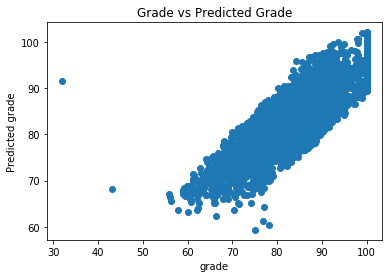

In [54]:
plt.scatter(df2['grade'], lm.predict(X))
plt.xlabel("grade")
plt.ylabel("Predicted grade")
plt.title("Grade vs Predicted Grade")
plt.show()

### Exercise 4:

Using the training data from the previous exercise, set a linear regression function to fit the data (build the model).

In [56]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, df2.grade, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1340, 4)
(660, 4)
(1340,)
(660,)


In [57]:
lm.fit(X_train, Y_train)
pred_train=lm.predict(X_train)
pred_test = lm.predict (X_test)

In [59]:
print(lm.score(X_train, Y_train))
print (lm.score(X_test, Y_test))

0.6827104100890926
0.6252226287723646


### Exercise 5:

What is the intercept coefficient (y-intercept) for the linear regression model?

In [60]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 55.84955854423636


### Exercise 6:

Use the predict function on the training data and the test data.

In [61]:
lm.predict(X)[0:5]

array([81.12591366, 69.89641622, 80.5737511 , 73.92670906, 91.94282181])

### Exercise 7:

Calculate the score of the training and test predictions. How "good" was the linear regression model at predicting the test data compared to the training data?

In [62]:
print(lm.score(X_train, Y_train))
print (lm.score(X_test, Y_test))

0.6827104100890926
0.6252226287723646
